## basics
 - llama2: https://github.com/facebookresearch/llama
 - rmsnorm: https://github.com/bzhangGo/rmsnorm
 - layernorm: https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html
 - Swish: SwiLU, SiLU
 https://arxiv.org/abs/1710.05941v1
 https://pytorch.org/docs/stable/generated/torch.nn.functional.silu.html

## reference
 - https://akgeni.medium.com/llama-concepts-explained-summary-a87f0bd61964
 - RMSNorm
 - Pre-normalization Using RMSNorm llama
 - root mean square norm

 - before attn

 - before ffn

 - 相比较 layernorm（re-centering，re-scaling），优化了计算时间；

 - rms norm 只关注 re-scaling
 
 

 

 - 我们自然地可以得到一个结论就是，经过 rms norm 之后的 
   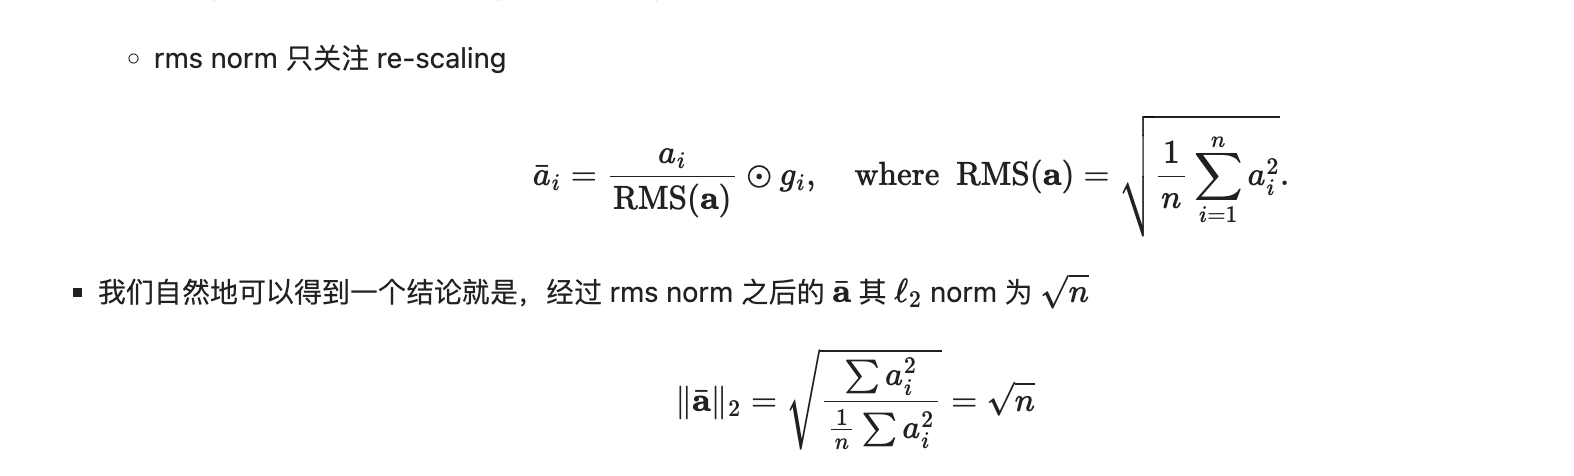

 
 ```python
class RMSNorm(torch.nn.Module):
    def __init__(self, dim: int, eps: float = 1e-6):
        super().__init__()
        self.eps = eps
        self.weight = nn.Parameter(torch.ones(dim))

    def _norm(self, x):
        return x * torch.rsqrt(x.pow(2).mean(-1, keepdim=True) + self.eps)

    def forward(self, x):
        output = self._norm(x.float()).type_as(x)
        return output * self.weight
 ```



In [18]:
import torch
from torch import nn
import numpy as np

class RMSNorm(nn.Module):
    def __init__(self, dim: int, eps: float = 1e-6):
        super().__init__()
        self.eps = eps
        self.weight = nn.Parameter(torch.ones(dim))

    def _norm(self, x):
        return x * torch.rsqrt(x.pow(2).mean(-1, keepdim=True) + self.eps)
    
    def forward(self, x):
        output = self._norm(x.float()).type_as(x)
        return output * self.weight

In [3]:
bs, seq_len, embedding_dim = 20, 5, 10
x = torch.randn(bs, seq_len, embedding_dim)
x

tensor([[[ 6.3619e-01,  5.4470e-01, -6.1049e-01, -9.7439e-01,  2.3609e+00,
          -7.6005e-01,  5.1469e-01,  5.8886e-02, -1.4357e+00,  2.2485e+00],
         [ 9.3593e-01,  5.2937e-01,  1.3226e-01, -6.1513e-01,  4.6630e-01,
          -1.7387e+00,  1.9034e+00,  4.1292e-01, -7.3818e-01, -7.8872e-01],
         [-1.1377e+00,  7.0198e-01,  1.1682e+00, -1.5620e+00, -3.7301e-01,
           3.3399e-01,  9.2481e-01,  1.5164e+00,  9.2193e-01, -1.0391e+00],
         [ 7.9000e-01,  9.1895e-04, -3.1637e-01, -1.5243e+00,  6.2611e-01,
          -1.4399e+00, -6.3489e-01, -1.5315e+00, -5.6238e-02, -1.0892e+00],
         [ 1.3778e+00, -9.0707e-01,  5.4298e-01,  6.4832e-01, -1.8026e+00,
           1.7723e+00, -1.5229e-01,  1.4490e-01,  2.7254e-01,  1.4833e-01]],

        [[ 1.5354e+00,  7.9491e-01, -1.0035e-02, -1.4941e+00,  2.3368e-01,
           1.3081e+00,  1.2863e+00,  1.3241e+00,  7.7125e-01,  1.4913e-01],
         [-2.2696e+00,  2.9568e-01,  1.1165e+00, -4.6039e-01, -1.1374e-01,
          -9.5564

In [17]:
ln = nn.LayerNorm(embedding_dim)
x_ln = ln(x)
print(x_ln[0,0,:].mean())
print(x_ln[0,0,:].std(unbiased=True))

tensor(5.9605e-09, grad_fn=<MeanBackward0>)
tensor(1.0541, grad_fn=<StdBackward0>)


In [20]:
rn = RMSNorm(embedding_dim)
x_rn = rn(x)
x_rn

tensor([[[ 5.1000e-01,  4.3666e-01, -4.8939e-01, -7.8112e-01,  1.8926e+00,
          -6.0929e-01,  4.1260e-01,  4.7206e-02, -1.1510e+00,  1.8025e+00],
         [ 9.4770e-01,  5.3603e-01,  1.3393e-01, -6.2287e-01,  4.7216e-01,
          -1.7606e+00,  1.9273e+00,  4.1812e-01, -7.4747e-01, -7.9864e-01],
         [-1.0884e+00,  6.7155e-01,  1.1175e+00, -1.4942e+00, -3.5684e-01,
           3.1951e-01,  8.8471e-01,  1.4507e+00,  8.8196e-01, -9.9406e-01],
         [ 8.1262e-01,  9.4526e-04, -3.2543e-01, -1.5680e+00,  6.4404e-01,
          -1.4811e+00, -6.5306e-01, -1.5754e+00, -5.7848e-02, -1.1203e+00],
         [ 1.3801e+00, -9.0857e-01,  5.4388e-01,  6.4939e-01, -1.8055e+00,
           1.7753e+00, -1.5254e-01,  1.4514e-01,  2.7299e-01,  1.4857e-01]],

        [[ 1.4631e+00,  7.5748e-01, -9.5628e-03, -1.4238e+00,  2.2268e-01,
           1.2465e+00,  1.2258e+00,  1.2617e+00,  7.3494e-01,  1.4211e-01],
         [-2.6481e+00,  3.4499e-01,  1.3027e+00, -5.3718e-01, -1.3271e-01,
          -1.1150

In [21]:
print(x_rn[0,0,:].mean())
print(x_rn[0,0,:].std(unbiased=True))

tensor(0.2071, grad_fn=<MeanBackward0>)
tensor(1.0312, grad_fn=<StdBackward0>)


## SwiGLU公式 markdown

$$silu(x) = x \cdot (x) = x \cdot \frac{1}{1+exp(-x)} = \frac{x}{1+exp(-x)}$$

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def swish(x):
    return x*sigmoid(x)

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

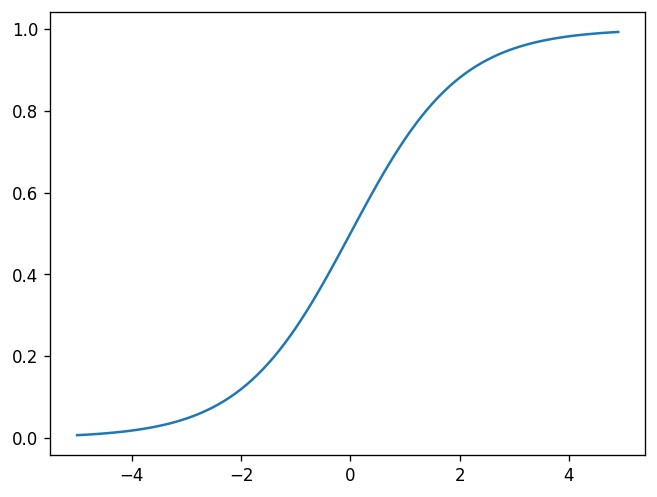

In [27]:
x = np.arange(-5, 5, 0.1)
plt.plot(x, sigmoid(x))

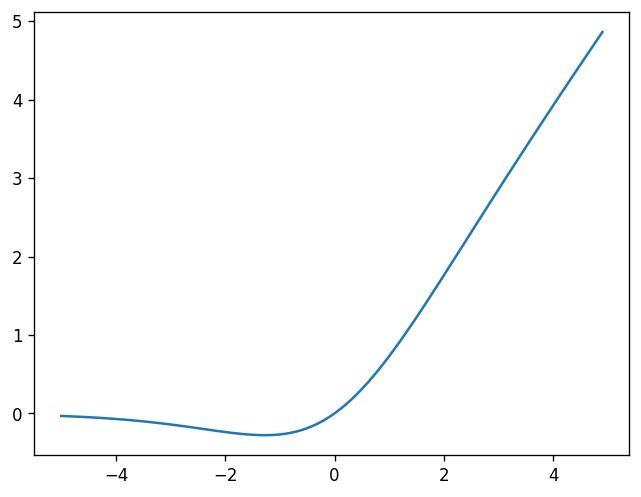

In [26]:
plt.plot(x, swish(x))

In [30]:
def softmax(x):
    # Subtract max for numerical stability
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Example usage
x = np.array([1.0, 2.0, 3.0, 4.0])
print("Input:", x)
print("Softmax output:", softmax(x))


Input: [1. 2. 3. 4.]
[-3. -2. -1.  0.]
[0.04978707 0.13533528 0.36787944 1.        ]
Softmax output: [0.0320586  0.08714432 0.23688282 0.64391426]


(-1.0999791907454364,
 1.099999009083116,
 -1.0999945499436368,
 1.0999945499436368)

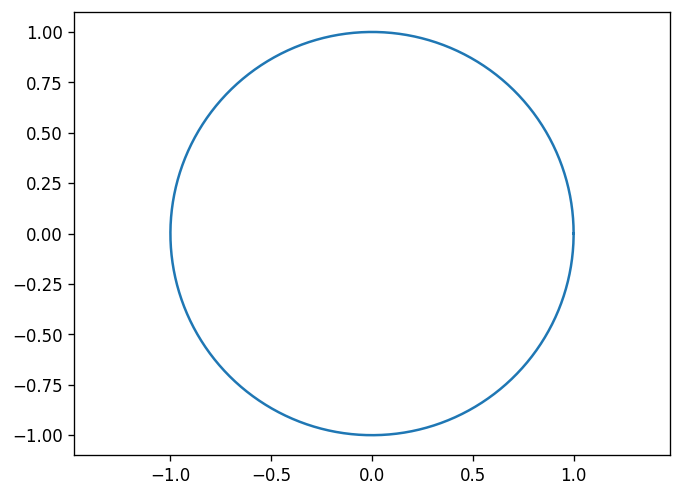

In [31]:
import numpy as np
import matplotlib.pyplot as plt

thetas = np.linspace(0, 2*np.pi, 500)

xs = np.real(np.exp(1j*thetas))
ys = np.imag(np.exp(1j*thetas))

plt.plot(xs, ys)
plt.axis('equal')

In [32]:
max_sequence_length = 10
d_model = 6

In [41]:
even_i = torch.arange(0,d_model,2, dtype=torch.float32)
even_i

tensor([0., 2., 4.])

In [39]:
odd_i = torch.arange(1,d_model,2, dtype=torch.float32)
odd_i

tensor([1., 3., 5.])

In [40]:
position = torch.arange(max_sequence_length, dtype=torch.float32)
position

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [44]:
torch.outer(position, 1./torch.pow(10000, even_i/d_model))
position.shape, (event_i/d_model).shape,torch.outer(position, 1./torch.pow(10000, even_i/d_model)).shape

(torch.Size([10]), torch.Size([3]), torch.Size([10, 3]))

## transformer sin/cos position encoding formula markdown

The transformer position encoding formula is:

 $$PE(pos, 2i) = sin(\frac{pos}{10000^(\frac{2i}{d\_model})})$$
 $$PE(pos, 2i+1) = cos(\frac{pos}{10000^(\frac{2i}{d\_model})})$$

 Where:
 - pos is the position in the sequence
 - i is the dimension index
 - d_model is the embedding dimension

 This creates a unique encoding for each position and dimension,
 allowing the model to learn relative positions of tokens.



In [47]:
even_pe = torch.sin(torch.outer(position, 1./torch.pow(10000, even_i/d_model)))
even_pe,even_pe.shape

(tensor([[ 0.0000,  0.0000,  0.0000],
         [ 0.8415,  0.0464,  0.0022],
         [ 0.9093,  0.0927,  0.0043],
         [ 0.1411,  0.1388,  0.0065],
         [-0.7568,  0.1846,  0.0086],
         [-0.9589,  0.2300,  0.0108],
         [-0.2794,  0.2749,  0.0129],
         [ 0.6570,  0.3192,  0.0151],
         [ 0.9894,  0.3629,  0.0172],
         [ 0.4121,  0.4057,  0.0194]]),
 torch.Size([10, 3]))

In [49]:
odd_pe = torch.cos(torch.outer(position, 1./torch.pow(10000, (odd_i-1)/d_model)))
odd_pe, odd_pe.shape

(tensor([[ 1.0000,  1.0000,  1.0000],
         [ 0.5403,  0.9989,  1.0000],
         [-0.4161,  0.9957,  1.0000],
         [-0.9900,  0.9903,  1.0000],
         [-0.6536,  0.9828,  1.0000],
         [ 0.2837,  0.9732,  0.9999],
         [ 0.9602,  0.9615,  0.9999],
         [ 0.7539,  0.9477,  0.9999],
         [-0.1455,  0.9318,  0.9999],
         [-0.9111,  0.9140,  0.9998]]),
 torch.Size([10, 3]))

In [55]:
torch.stack([even_pe, odd_pe], dim=2).shape, torch.concat([even_pe, odd_pe], dim=1).shape

(torch.Size([10, 3, 2]), torch.Size([10, 6]))

In [63]:
even_pe,odd_pe,even_pe.shape

(tensor([[ 0.0000,  0.0000,  0.0000],
         [ 0.8415,  0.0464,  0.0022],
         [ 0.9093,  0.0927,  0.0043],
         [ 0.1411,  0.1388,  0.0065],
         [-0.7568,  0.1846,  0.0086],
         [-0.9589,  0.2300,  0.0108],
         [-0.2794,  0.2749,  0.0129],
         [ 0.6570,  0.3192,  0.0151],
         [ 0.9894,  0.3629,  0.0172],
         [ 0.4121,  0.4057,  0.0194]]),
 tensor([[ 1.0000,  1.0000,  1.0000],
         [ 0.5403,  0.9989,  1.0000],
         [-0.4161,  0.9957,  1.0000],
         [-0.9900,  0.9903,  1.0000],
         [-0.6536,  0.9828,  1.0000],
         [ 0.2837,  0.9732,  0.9999],
         [ 0.9602,  0.9615,  0.9999],
         [ 0.7539,  0.9477,  0.9999],
         [-0.1455,  0.9318,  0.9999],
         [-0.9111,  0.9140,  0.9998]]),
 torch.Size([10, 3]))

In [59]:
torch.concat([even_pe, odd_pe], dim=1)

tensor([[ 0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  1.0000],
        [ 0.8415,  0.0464,  0.0022,  0.5403,  0.9989,  1.0000],
        [ 0.9093,  0.0927,  0.0043, -0.4161,  0.9957,  1.0000],
        [ 0.1411,  0.1388,  0.0065, -0.9900,  0.9903,  1.0000],
        [-0.7568,  0.1846,  0.0086, -0.6536,  0.9828,  1.0000],
        [-0.9589,  0.2300,  0.0108,  0.2837,  0.9732,  0.9999],
        [-0.2794,  0.2749,  0.0129,  0.9602,  0.9615,  0.9999],
        [ 0.6570,  0.3192,  0.0151,  0.7539,  0.9477,  0.9999],
        [ 0.9894,  0.3629,  0.0172, -0.1455,  0.9318,  0.9999],
        [ 0.4121,  0.4057,  0.0194, -0.9111,  0.9140,  0.9998]])

In [67]:
stacked = torch.stack([even_pe, odd_pe], dim=2)
torch.flatten(stacked, start_dim=1, end_dim=2)

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [68]:
class SinPositionEncoding(nn.Module):
    def __init__(self, max_sequence_length, d_model, base=10000):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model
        self.base = base
    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        odd_i = torch.arange(1, self.d_model, 2).float()
        position = torch.arange(self.max_sequence_length, dtype=torch.float)
        even_pe = torch.sin(torch.outer(position, 1./torch.pow(self.base, even_i/self.d_model)))
        odd_pe = torch.cos(torch.outer(position,  1./torch.pow(self.base, (odd_i-1)/self.d_model)))
        stacked = torch.stack([even_pe, odd_pe], dim=2)
        return torch.flatten(stacked, start_dim=1, end_dim=2)

In [70]:
spe = SinPositionEncoding(max_sequence_length, d_model)
spe()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

## complex sin position encoding
 - llama2
 - https://github.com/facebookresearch/llama/blob/main/llama/model.py

$$ \text{out} = \text{abs} \cdot \cos(\text{angle}) + \text{abs} \cdot \sin(\text{angle}) \cdot j$$

In [89]:
x = torch.randn(2,2)
y = torch.randn(2,2)
print(x)
print(torch.abs(x) * torch.cos(y))
print(torch.abs(x) * torch.sin(y))
print(y)
torch.polar(x, y)


tensor([[ 0.2723, -0.3249],
        [-0.0597,  1.0219]])
tensor([[0.2658, 0.2108],
        [0.0546, 0.5087]])
tensor([[0.0592, 0.2473],
        [0.0242, 0.8862]])
tensor([[0.2190, 0.8651],
        [0.4164, 1.0497]])


tensor([[ 0.2658+0.0592j, -0.2108-0.2473j],
        [-0.0546-0.0242j,  0.5087+0.8862j]])

In [79]:
def precompute_freqs_cis(dim: int, end: int, theta: float = 10000.0):
    freqs = 1.0 / (theta ** (torch.arange(0, dim, 2)[:dim//2].float() / dim))
    print(freqs)
    t = torch.arange(end, device=freqs.device)  # type: ignore
    freqs = torch.outer(t, freqs).float()  # type: ignore
    print(freqs)
    print(freqs.shape)
    freqs_cis = torch.polar(torch.ones_like(freqs), freqs)  # complex64
    print(freqs_cis.shape)
    return freqs_cis

In [80]:
precompute_freqs_cis(6, 10)

tensor([1.0000, 0.0464, 0.0022])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 4.6416e-02, 2.1544e-03],
        [2.0000e+00, 9.2832e-02, 4.3089e-03],
        [3.0000e+00, 1.3925e-01, 6.4633e-03],
        [4.0000e+00, 1.8566e-01, 8.6177e-03],
        [5.0000e+00, 2.3208e-01, 1.0772e-02],
        [6.0000e+00, 2.7850e-01, 1.2927e-02],
        [7.0000e+00, 3.2491e-01, 1.5081e-02],
        [8.0000e+00, 3.7133e-01, 1.7235e-02],
        [9.0000e+00, 4.1774e-01, 1.9390e-02]])
torch.Size([10, 3])
torch.Size([10, 3])


tensor([[ 1.0000+0.0000j,  1.0000+0.0000j,  1.0000+0.0000j],
        [ 0.5403+0.8415j,  0.9989+0.0464j,  1.0000+0.0022j],
        [-0.4161+0.9093j,  0.9957+0.0927j,  1.0000+0.0043j],
        [-0.9900+0.1411j,  0.9903+0.1388j,  1.0000+0.0065j],
        [-0.6536-0.7568j,  0.9828+0.1846j,  1.0000+0.0086j],
        [ 0.2837-0.9589j,  0.9732+0.2300j,  0.9999+0.0108j],
        [ 0.9602-0.2794j,  0.9615+0.2749j,  0.9999+0.0129j],
        [ 0.7539+0.6570j,  0.9477+0.3192j,  0.9999+0.0151j],
        [-0.1455+0.9894j,  0.9318+0.3629j,  0.9999+0.0172j],
        [-0.9111+0.4121j,  0.9140+0.4057j,  0.9998+0.0194j]])

In [90]:
class SinPositionEncoding(nn.Module):
    def __init__(self, max_sequence_length, d_model, base=10000):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model
        self.base = base
    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        position = torch.arange(self.max_sequence_length, dtype=torch.float)
        freqs = torch.outer(position, 1./torch.pow(self.base, even_i/d_model))
        freqs_cis = torch.polar(torch.ones_like(freqs), freqs)
        return torch.flip(torch.view_as_real(freqs_cis), dims=(2, )).flatten(start_dim=1, end_dim=2)

In [93]:
spe = SinPositionEncoding(10, 6)
spe()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])